## Imports

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np 
import matplotlib.pyplot as plt
import os
import random

2023-12-03 17:42:49.547035: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-03 17:42:49.547061: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-03 17:42:49.547083: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-03 17:42:49.551958: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Checking version of tensorflow and if GPU is available

In [2]:
tf.__version__

'2.14.0'

In [3]:
tf.config.list_physical_devices('GPU')

2023-12-03 17:43:06.019140: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-03 17:43:06.022606: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-03 17:43:06.022727: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
!nvidia-smi -L

GPU 0: NVIDIA GeForce GTX 1660 Ti (UUID: GPU-9ce5225a-66a1-9524-b256-8c7dfd5cbc23)


## Getting the data

In [5]:
(train_data, test_data), ds_info = tfds.load('food101',
                                            split = ["train","validation"],
                                            as_supervised = True,
                                            with_info = True,
                                            shuffle_files = True
                                            )

2023-12-03 17:43:06.776850: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-03 17:43:06.777014: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-03 17:43:06.777115: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [6]:
ds_info

tfds.core.DatasetInfo(
    name='food101',
    full_name='food101/2.0.0',
    description="""
    This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.
    """,
    homepage='https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/',
    data_dir='/home/mayank/tensorflow_datasets/food101/2.0.0',
    file_format=tfrecord,
    download_size=4.65 GiB,
    dataset_size=4.77 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <Split

In [7]:
class_names = ds_info.features['label'].names
class_names

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

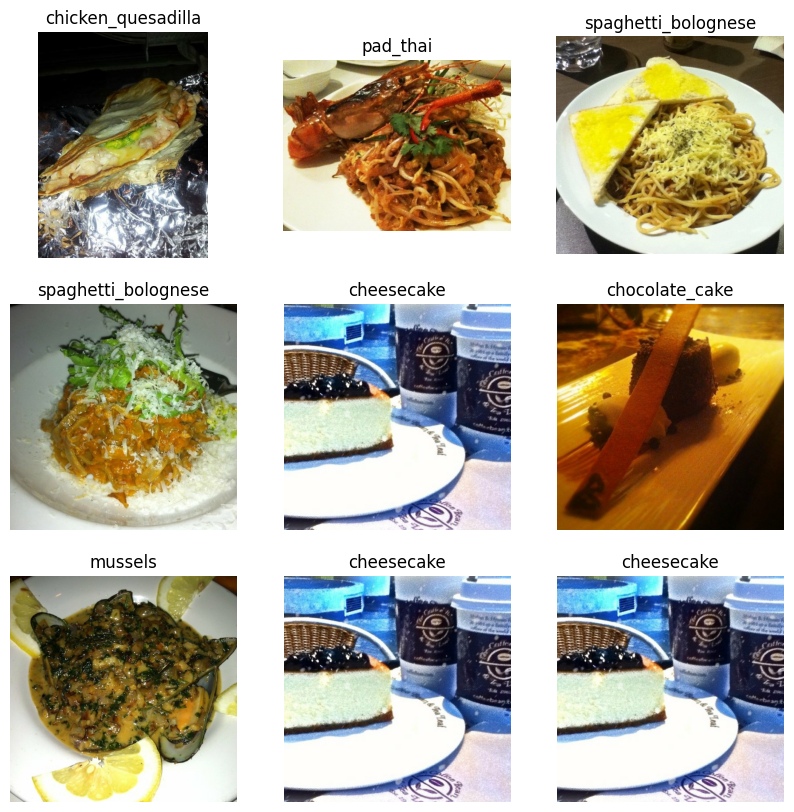

In [8]:
plt.figure(figsize = (10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    for images, labels in train_data.take(1):     
        plt.imshow(images)
        plt.title(class_names[labels])
        plt.axis('off')

## Setting Up Mixed Precision 

In [9]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce GTX 1660 Ti, compute capability 7.5


2023-12-03 17:43:14.416539: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce GTX 1660 Ti, compute capability 7.5


In [10]:
def preprocessing_image(image,label, image_size = 224):
    image = tf.image.resize(image, size = [image_size,image_size])
    image = tf.cast(image, tf.float32)
    return image, label

In [11]:
train_dataset = train_data.map(preprocessing_image, num_parallel_calls = tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size = 1000).batch(32).prefetch(tf.data.AUTOTUNE)

test_dataset = test_data.map(preprocessing_image, num_parallel_calls = tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

## Callbacks

In [12]:
def create_checkpoint(name):
    filepath = 'checkpoints/'+ name 
    save_ckpt = tf.keras.callbacks.ModelCheckpoint(
        filepath = filepath +'.ckpt',
        monitor = 'val_accuracy',
        save_best_only = True,
        save_weights_only = True,
        save_freq = 'epoch',
        verbose = 1
    )
    return save_ckpt

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                                factor = 0.2,
                                                min_lr = 1e-7,
                                                patience = 2,
                                                verbose =1
                                                )

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                 patience = 3,
                                                 verbose=0
                                                 )

## Plot History Function

In [13]:
def plot_history(history):
    loss = history.history['loss']
    accuracy = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(loss))
    
    plt.figure(figsize = (10,7))
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

  # Plot accuracy
    plt.figure()
    plt.figure(figsize = (10,7))
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();


## Feature Extration Model

In [14]:
eff_net_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top = False)
eff_net_model.trainable = False

In [15]:
inputs = tf.keras.Input(shape = (224,224,3))
eff_net = eff_net_model(inputs, training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(eff_net)
x = tf.keras.layers.Dense(len(class_names))(x)
outputs = tf.keras.layers.Activation('sigmoid', dtype = tf.float32)(x)

model = tf.keras.models.Model(inputs,outputs)

In [16]:
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
             optimizer = tf.keras.optimizers.Adam(),
             metrics = ['accuracy'])

In [17]:
fe_model_history = model.fit(train_dataset,
                            epochs = 10,
                            validation_data = test_dataset,
                            validation_steps = int(0.15 * len(test_dataset)),
                            callbacks = [create_checkpoint('eff_model')]                            
)

Epoch 1/10


2023-12-03 17:43:22.154189: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-03 17:43:22.615008: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2023-12-03 17:43:22.712747: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


   2/2368 [..............................] - ETA: 3:58 - loss: 4.6873 - accuracy: 0.0000e+00   

2023-12-03 17:43:23.782966: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x557a46453b80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-03 17:43:23.782988: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2023-12-03 17:43:23.788163: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-03 17:43:23.860803: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2368/2368 [==============================] - ETA: 0s - loss: 1.7151 - accuracy: 0.5826
Epoch 1: val_accuracy improved from -inf to 0.69968, saving model to checkpoints/eff_model.ckpt
2368/2368 [==============================] - 271s 112ms/step - loss: 1.7151 - accuracy: 0.5826 - val_loss: 1.1251 - val_accuracy: 0.6997
Epoch 2/10
2368/2368 [==============================] - ETA: 0s - loss: 1.1990 - accuracy: 0.6887
Epoch 2: val_accuracy improved from 0.69968 to 0.71928, saving model to checkpoints/eff_model.ckpt
2368/2368 [==============================] - 370s 156ms/step - loss: 1.1990 - accuracy: 0.6887 - val_loss: 1.0235 - val_accuracy: 0.7193
Epoch 3/10
2368/2368 [==============================] - ETA: 0s - loss: 1.0542 - accuracy: 0.7231
Epoch 3: val_accuracy improved from 0.71928 to 0.72299, saving model to checkpoints/eff_model.ckpt
2368/2368 [==============================] - 277s 115ms/step - loss: 1.0542 - accuracy: 0.7231 - val_loss: 0.9980 - val_accuracy: 0.7230
Epoch 4/10
2

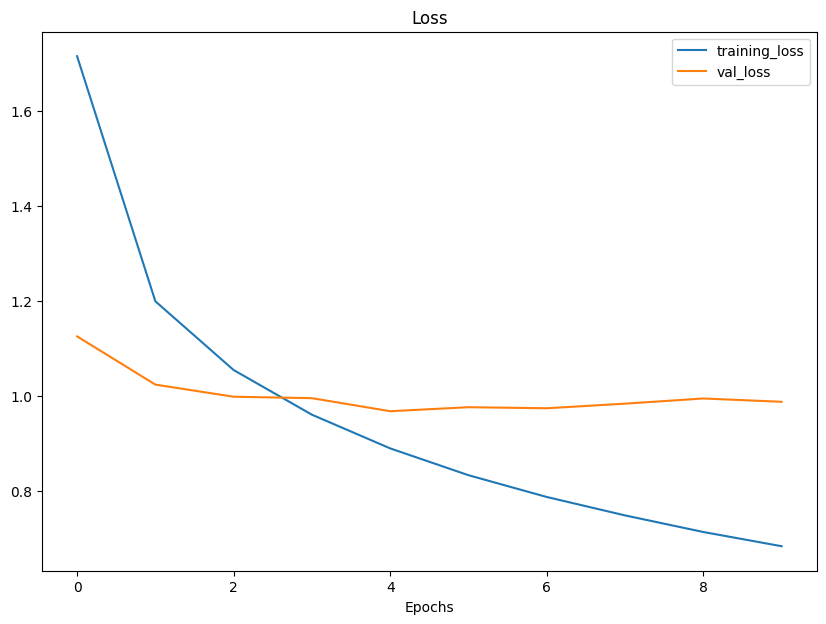

<Figure size 640x480 with 0 Axes>

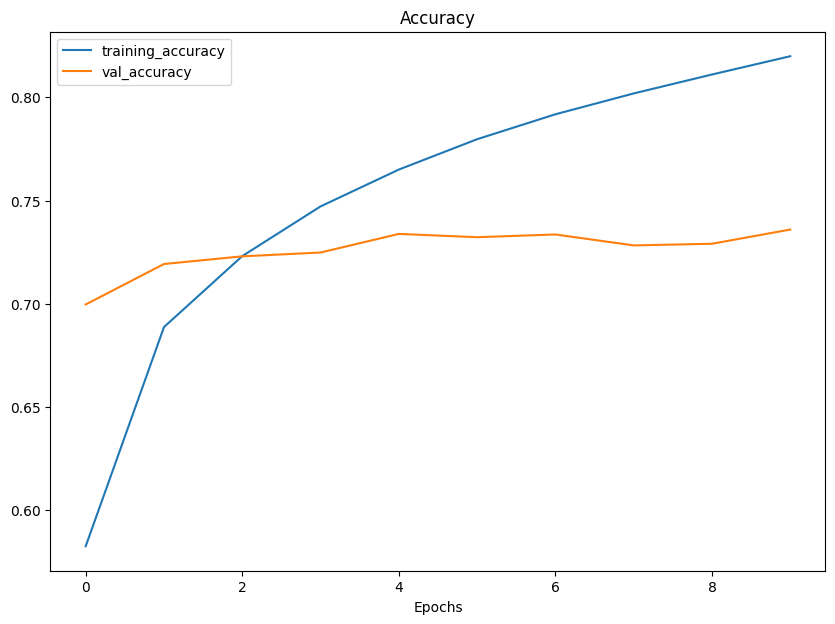

In [18]:
plot_history(fe_model_history)

In [19]:
model.load_weights('checkpoints/eff_model.ckpt')

In [20]:
model.evaluate(test_dataset)

790/790 [==============================] - 83s 106ms/step - loss: 0.9959 - accuracy: 0.7339


[0.9959211945533752, 0.7339009642601013]

## Fine Tuning

In [21]:
for layer in model.layers:
    print(f'Name:{layer.name} trainable: {layer.trainable} dtype: {layer.dtype}  Policy: {layer.dtype_policy}')

Name:input_2 trainable: True dtype: float32  Policy: <Policy "float32">
Name:efficientnetb0 trainable: False dtype: float32  Policy: <Policy "mixed_float16">
Name:global_average_pooling2d trainable: True dtype: float32  Policy: <Policy "mixed_float16">
Name:dense trainable: True dtype: float32  Policy: <Policy "mixed_float16">
Name:activation trainable: True dtype: float32  Policy: <Policy "float32">


In [22]:
for layer in model.layers[1].layers:
    print(f'Name:{layer.name} trainable: {layer.trainable}  dtype: {layer.dtype}  Policy: {layer.dtype_policy}')

Name:input_1 trainable: False  dtype: float32  Policy: <Policy "float32">
Name:rescaling trainable: False  dtype: float32  Policy: <Policy "mixed_float16">
Name:normalization trainable: False  dtype: float32  Policy: <Policy "mixed_float16">
Name:rescaling_1 trainable: False  dtype: float32  Policy: <Policy "mixed_float16">
Name:stem_conv_pad trainable: False  dtype: float32  Policy: <Policy "mixed_float16">
Name:stem_conv trainable: False  dtype: float32  Policy: <Policy "mixed_float16">
Name:stem_bn trainable: False  dtype: float32  Policy: <Policy "mixed_float16">
Name:stem_activation trainable: False  dtype: float32  Policy: <Policy "mixed_float16">
Name:block1a_dwconv trainable: False  dtype: float32  Policy: <Policy "mixed_float16">
Name:block1a_bn trainable: False  dtype: float32  Policy: <Policy "mixed_float16">
Name:block1a_activation trainable: False  dtype: float32  Policy: <Policy "mixed_float16">
Name:block1a_se_squeeze trainable: False  dtype: float32  Policy: <Policy "mi

In [23]:
for layer in model.layers:
    layer.trainable = True

In [24]:
for layer in model.layers:
    print(f'Name:{layer.name}  trainable: {layer.trainable}  dtype: {layer.dtype}  Policy: {layer.dtype_policy}')

Name:input_2  trainable: True  dtype: float32  Policy: <Policy "float32">
Name:efficientnetb0  trainable: True  dtype: float32  Policy: <Policy "mixed_float16">
Name:global_average_pooling2d  trainable: True  dtype: float32  Policy: <Policy "mixed_float16">
Name:dense  trainable: True  dtype: float32  Policy: <Policy "mixed_float16">
Name:activation  trainable: True  dtype: float32  Policy: <Policy "float32">


In [25]:
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
             optimizer = tf.keras.optimizers.Adam(1e-4),
             metrics = ['accuracy'])

In [26]:
ft_model_history = model.fit(train_dataset,
                            epochs = 15,
                            steps_per_epoch=len(train_dataset),
                            validation_data = test_dataset,
                            validation_steps = int(0.15 * len(test_dataset)),
                            callbacks = [create_checkpoint('fine_tuned_eff_model'), reduce_lr,
                                        # early_stopping
                                        ]                            
)

Epoch 1/15
2368/2368 [==============================] - ETA: 0s - loss: 0.6970 - accuracy: 0.8037
Epoch 1: val_accuracy improved from -inf to 0.75477, saving model to checkpoints/fine_tuned_eff_model.ckpt
2368/2368 [==============================] - 868s 347ms/step - loss: 0.6970 - accuracy: 0.8037 - val_loss: 0.8690 - val_accuracy: 0.7548 - lr: 1.0000e-04
Epoch 2/15
2368/2368 [==============================] - ETA: 0s - loss: 0.3983 - accuracy: 0.8852
Epoch 2: val_accuracy improved from 0.75477 to 0.76986, saving model to checkpoints/fine_tuned_eff_model.ckpt
2368/2368 [==============================] - 820s 344ms/step - loss: 0.3983 - accuracy: 0.8852 - val_loss: 0.8994 - val_accuracy: 0.7699 - lr: 1.0000e-04
Epoch 3/15
2368/2368 [==============================] - ETA: 0s - loss: 0.2252 - accuracy: 0.9334
Epoch 3: val_accuracy did not improve from 0.76986

Epoch 3: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
2368/2368 [==============================] - 817s 34

In [27]:
model.load_weights('checkpoints/fine_tuned_eff_model.ckpt')

In [39]:
model.evaluate(test_dataset)

790/790 [==============================] - 74s 92ms/step - loss: 1.0049 - accuracy: 0.7943


[1.0049093961715698, 0.7943366169929504]

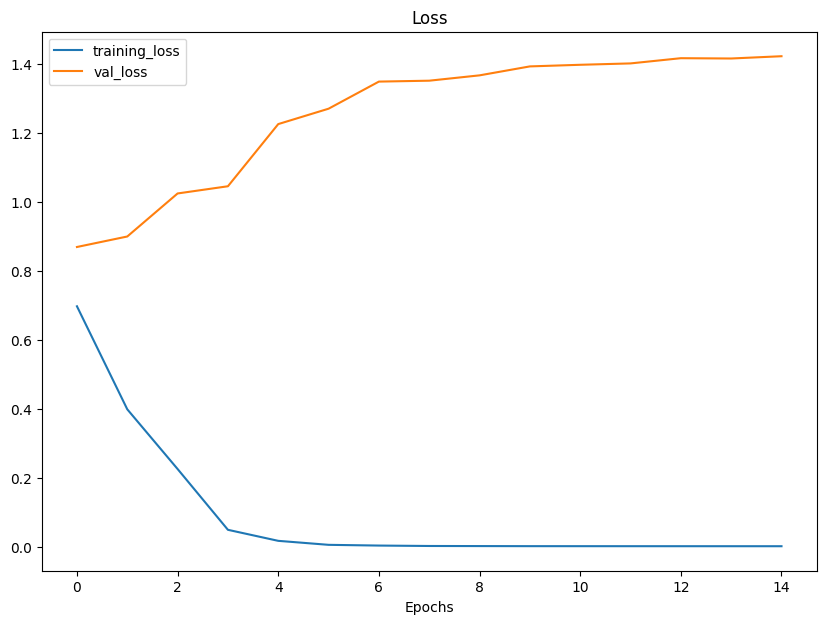

<Figure size 640x480 with 0 Axes>

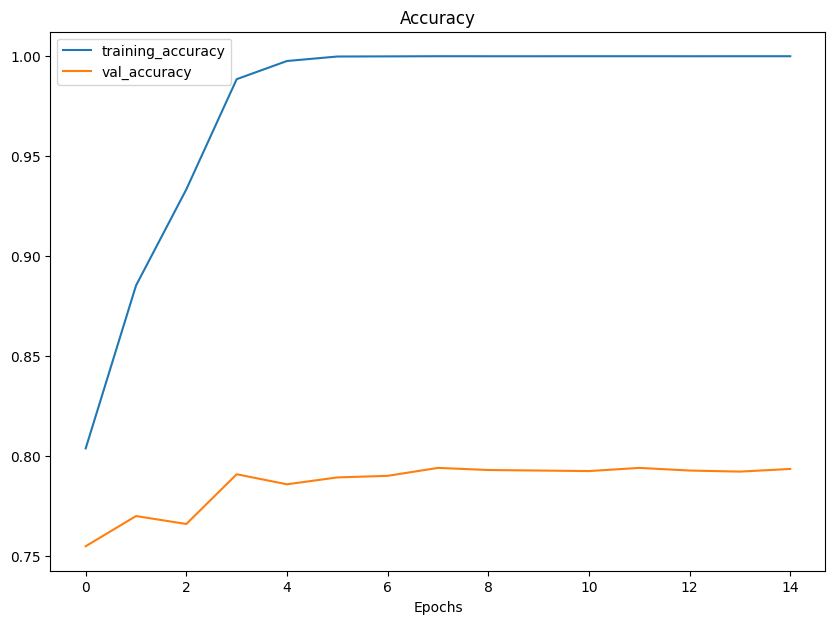

In [40]:
plot_history(ft_model_history)

In [41]:
# model.save('best_model.h5')

In [ ]:
model = tf.keras.load_model("best_model.h5")

## Prediction on custom images

In [33]:
def predict_food(file_path):
    image = tf.io.read_file(file_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.resize(image, size = [224,224])
    pred_probs = model.predict(tf.expand_dims(image,axis =0))
    preds = pred_probs[0].argmax()
    food_name = class_names[preds]

    # return(pred_probs)
    plt.imshow(image/255.)
    plt.title(food_name)
    plt.axis('off')

1/1 [==============================] - 5s 5s/step


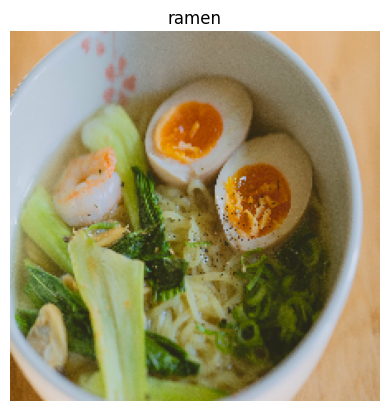

In [50]:
predict_food('Ramen.jpg')